In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfS1=pd.read_excel('AirTrafficData.xlsx',sheet_name='CountrywiseQuarterly')    #DataFrame for Sheet 1 of DataSet
dfS2=pd.read_excel('AirTrafficData.xlsx',sheet_name='CitypairwiseQuarterly')   #DataFrame for Sheet 2 of DataSet  
dfS3=pd.read_excel('AirTrafficData.xlsx',sheet_name='AirlinewiseMonthly')      #DataFrame for Sheet 3 of DataSet

# Q1. Which country carried maximum number of passengers to and from India in 2015 and 2016?

In [4]:
df1=dfS1.drop(dfS1[dfS1['YEAR']==17].index)
df1=df1[['COUNTRY NAME','PASSENGERS TO INDIA','PASSENGERS FROM INDIA']].groupby(['COUNTRY NAME'],as_index=False).sum()
mx1=df1[df1['PASSENGERS TO INDIA']==df1['PASSENGERS TO INDIA'].max()]
mx2=df1[df1['PASSENGERS FROM INDIA']==df1['PASSENGERS FROM INDIA'].max()]
c1=mx1['COUNTRY NAME'].to_string(index=False)
c2=mx2['COUNTRY NAME'].to_string(index=False)
p1=mx1['PASSENGERS TO INDIA'].to_string(index=False)
p2=mx2['PASSENGERS FROM INDIA'].to_string(index=False)
print("Country Carrying maximum number of passengers to India is {} with {} passengers".format(c1,p1))
print("Country Carrying maximum number of passengers from India is {}  with {} passengers".format(c2,p2))

Country Carrying maximum number of passengers to India is UNITED ARAB EMIRATES* with 15045602 passengers
Country Carrying maximum number of passengers from India is UNITED ARAB EMIRATES*  with 15398512 passengers


# Q2. In the year 2015, show the trend of freight from India on the basis of all months. And compare it with the trend of freight to India.

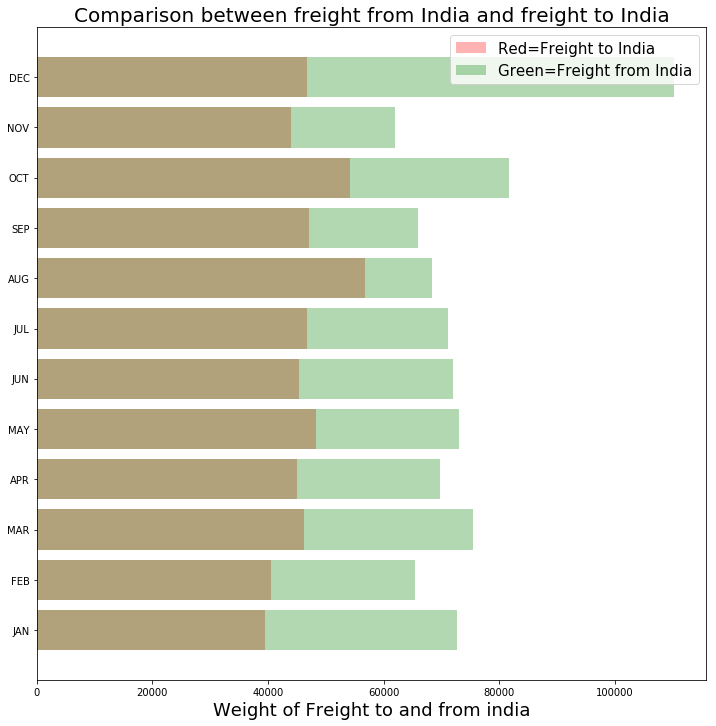

In [5]:
df2=dfS3.drop(dfS3[dfS3['YEAR']!=2015].index)
df2=df2[['MONTH','FREIGHT TO INDIA', 'FREIGHT FROM INDIA']].groupby(['MONTH'],as_index=False).sum()

months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", 
          "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

df2['MONTH'] = pd.Categorical(df2['MONTH'], categories=months, ordered=True)
df2.sort_values(by='MONTH',inplace=True)
df2=df2.reset_index(drop=True)


plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(df2['MONTH'],df2['FREIGHT TO INDIA'],alpha=0.3,color='r')
plt.barh(df2['MONTH'],df2['FREIGHT FROM INDIA'],alpha=0.3,color='g')
plt.xlabel('Weight of Freight to and from india',fontsize=18)
l=['Red=Freight to India','Green=Freight from India']
plt.legend(l,loc=1,fontsize=15)
plt.title('Comparison between freight from India and freight to India',fontsize=20)
plt.show()

# Q3. In 2015, which foreign airlines did not travel to and from India but did in the subsequent year?

In [6]:
df3=dfS3.drop(dfS3[dfS3['YEAR']==2017].index)

df31=df3.loc[ (df3['YEAR']==2015) & (df3['PASSENGERS TO INDIA']==0) & (df3['PASSENGERS FROM INDIA']==0) & (df3['FREIGHT FROM INDIA']==0) &(df3['FREIGHT FROM INDIA']==0) ]
df31=df31['AIRLINE NAME']

df32=df3.loc[ (df3['YEAR']==2016) & ((df3['PASSENGERS TO INDIA']!=0) | (df3['PASSENGERS FROM INDIA']!=0) | (df3['FREIGHT FROM INDIA']!=0) | (df3['FREIGHT FROM INDIA']!=0)) ]
df32=df32['AIRLINE NAME']

df31=set(df31)
df32=set(df32)

for i in list((df31 & df32)):
    print(i)

AIR MANAS
TURKISH AIRLINES
AIR CANADA
SHANDONG AIRLINES
AIR FRANCE
BUDHHA AIR
IRAQI AIRWAYS
KOREAN AIR
AEROLOGIC
BRITISH AIRWAYS
AIR AUSTRAL
NEPAL AIRLINES CORPORATION
THOMAS COOK AIRLINES U.K.
DRAGON AIR
MYANMAR AIRLINES
YEMENIA AIRWAYS
BHUTAN AIRLINES


# Q4. Which foreign airline flight carry maximum number of passengers to and from India?

In [7]:
df4=dfS3[['AIRLINE NAME','PASSENGERS TO INDIA','PASSENGERS FROM INDIA']].groupby(['AIRLINE NAME'],as_index=False).sum()

mx1=df4[df4['PASSENGERS TO INDIA']==df4['PASSENGERS TO INDIA'].max()]
mx2=df4[df4['PASSENGERS FROM INDIA']==df4['PASSENGERS FROM INDIA'].max()]

c1=mx1['AIRLINE NAME'].to_string(index=False)
c2=mx2['AIRLINE NAME'].to_string(index=False)
p1=mx1['PASSENGERS TO INDIA'].to_string(index=False)
p2=mx2['PASSENGERS FROM INDIA'].to_string(index=False)

print("Airline Carrying maximum number of passengers to India is {} with {} passengers".format(c1,p1))
print("Airline Carrying maximum number of passengers from India is {}  with {} passengers".format(c2,p2))

Airline Carrying maximum number of passengers to India is JET AIRWAYS with 8320544.0 passengers
Airline Carrying maximum number of passengers from India is JET AIRWAYS  with 8471096 passengers


# Q5. Which foreign airlines carries only freight to and from India but no passenger?

In [8]:
df5=dfS3[['YEAR','CARRIER TYPE','AIRLINE NAME','PASSENGERS TO INDIA','PASSENGERS FROM INDIA','FREIGHT TO INDIA','FREIGHT FROM INDIA']]
df51=df5.loc[ (df5['CARRIER TYPE']=='FOREIGN') ]
df51=df5.loc[ (df5['YEAR']==2015) & (df5['PASSENGERS TO INDIA']==0) & (df5['PASSENGERS FROM INDIA']==0) & (df5['FREIGHT FROM INDIA']!=0) &(df5['FREIGHT FROM INDIA']!=0) ]
df52=df5.loc[ (df5['YEAR']==2016) & (df5['PASSENGERS TO INDIA']==0) & (df5['PASSENGERS FROM INDIA']==0) & (df5['FREIGHT FROM INDIA']!=0) &(df5['FREIGHT FROM INDIA']!=0) ]
df53=df5.loc[ (df5['YEAR']==2017) & (df5['PASSENGERS TO INDIA']==0) & (df5['PASSENGERS FROM INDIA']==0) & (df5['FREIGHT FROM INDIA']!=0) &(df5['FREIGHT FROM INDIA']!=0) ]
df51=list(set(df51['AIRLINE NAME']))
df52=list(set(df52['AIRLINE NAME']))
df53=list(set(df53['AIRLINE NAME']))
print("Foreign airlines which carried only freight to and from India but no passenger in 2015: \n")
for i in range(0,len(df51)):
    print("{} {}".format(i+1,df51[i]))
    
print("\nForeign airlines which carried only freight to and from India but no passenger in 2016: \n")
for i in range(0,len(df52)):
    print("{} {}".format(i+1,df52[i]))
    
print("\nForeign airlines which carried only freight to and from India but no passenger in 2017: \n")
for i in range(0,len(df53)):
    print("{} {}".format(i+1,df53[i])) 

Foreign airlines which carried only freight to and from India but no passenger in 2015: 

1 ETHIOPIAN AIRLINES
2 KALITTA AIR
3 UNITED PARCEL SERVICES
4 KAM AIR
5 AEROLOGIC
6 AIR AUSTRAL
7 FEDERAL EXPRESS
8 MARTIN AIR HOLLAND

Foreign airlines which carried only freight to and from India but no passenger in 2016: 

1 KALITTA AIR
2 UNITED PARCEL SERVICES
3 CARGOLUX AIRLINES INTERNATIONAL S.A.
4 AEROLOGIC
5 FEDERAL EXPRESS

Foreign airlines which carried only freight to and from India but no passenger in 2017: 

1 UNITED PARCEL SERVICES
2 KALITTA AIR
3 CARGOLUX AIRLINES INTERNATIONAL S.A.
4 AEROLOGIC
5 FEDERAL EXPRESS


# Q6. Using graph show the percentage of the no. of passengers carried out of India by each airline in the year 2015.

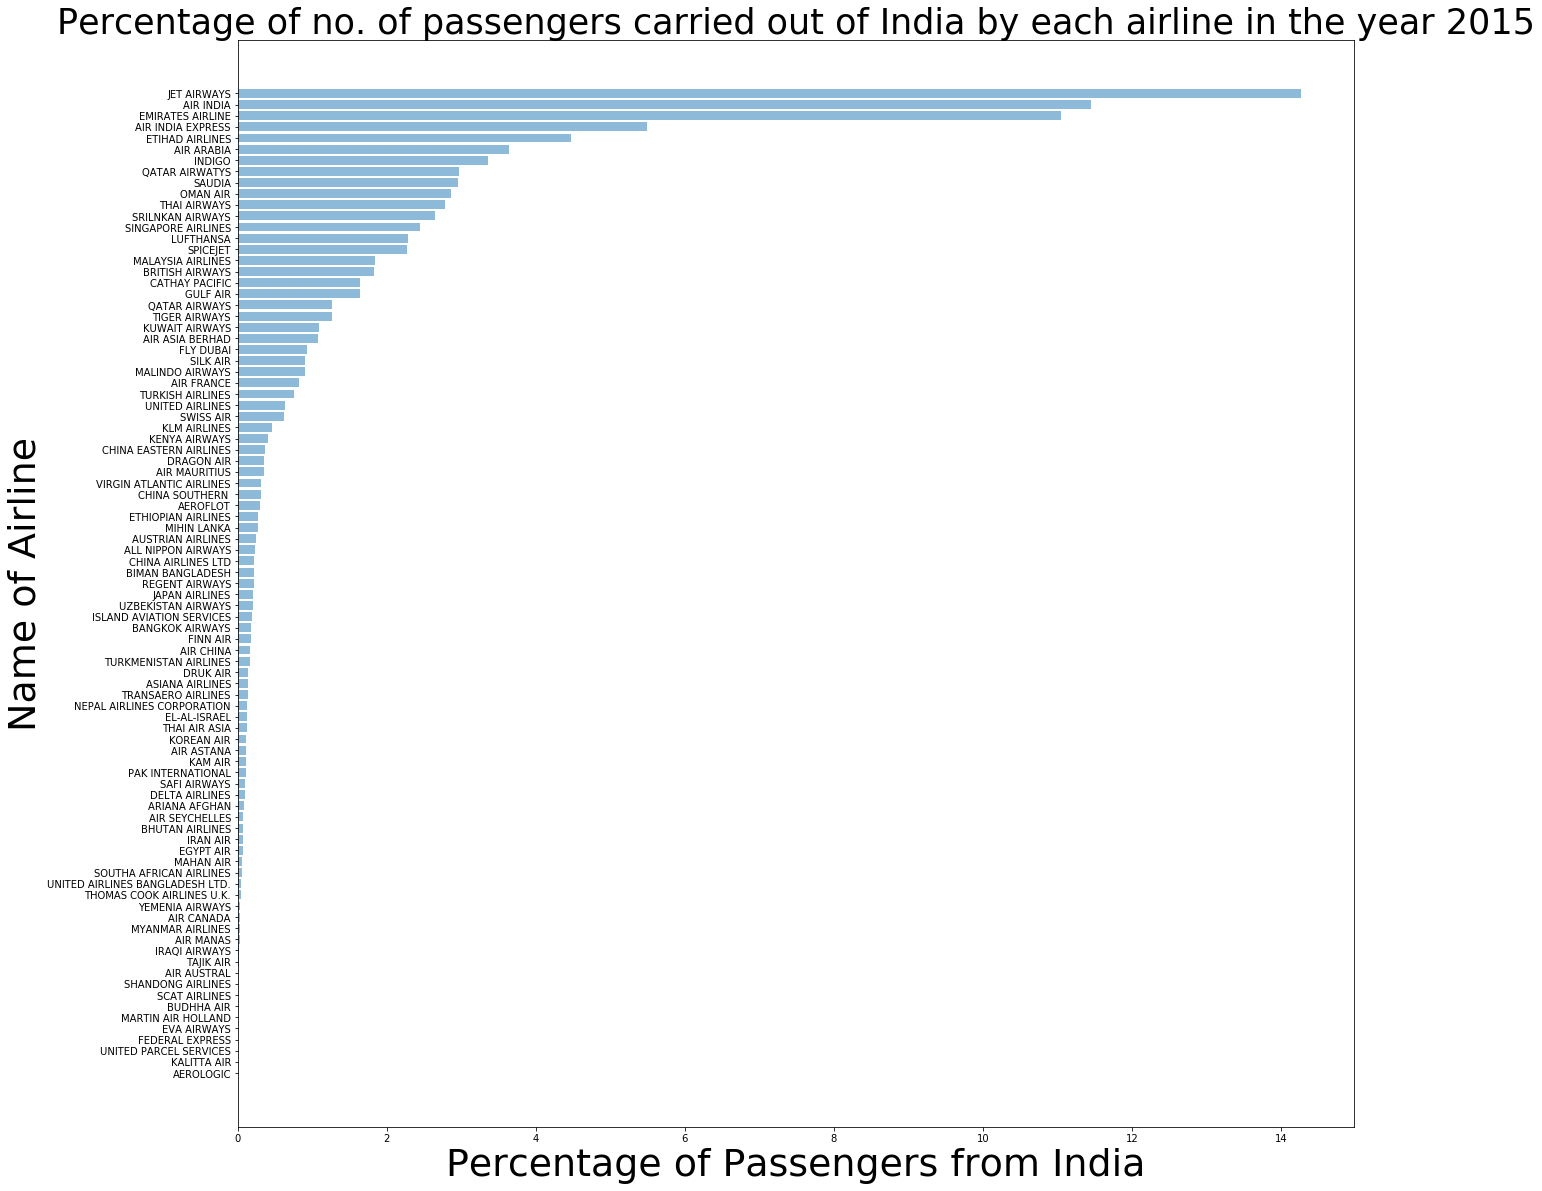

In [9]:
df6=dfS3.drop(dfS3[dfS3['YEAR']!=2015].index)
df6=df6[['AIRLINE NAME','PASSENGERS FROM INDIA']].groupby(['AIRLINE NAME'],as_index=False).sum()

df6.sort_values(by=['PASSENGERS FROM INDIA'], inplace=True)
total=df6['PASSENGERS FROM INDIA'].sum()
df6['Percentage']=(df6['PASSENGERS FROM INDIA']*100)/total
plt.rcParams['figure.figsize'] = [20, 20]
plt.xlabel('Percentage of Passengers from India',fontsize=38)
plt.ylabel('Name of Airline',fontsize=38)
plt.title('Percentage of no. of passengers carried out of India by each airline in the year 2015',fontsize=35)

plt.barh(df6['AIRLINE NAME'], df6['Percentage'], align='center', alpha=0.5)
plt.show()

# Q7. What is the average weight of freight carried out of India in 2016. Compare it with the average weight of freight carried inside India in 2016 (Using Sheet 1).

In [10]:
df7=dfS1.drop(dfS1[dfS1['YEAR']!=2016].index)
df71=df7[['FREIGHT TO INDIA','FREIGHT FROM INDIA']]
toIndia=df71['FREIGHT TO INDIA'].mean()
fromIndia=df71['FREIGHT FROM INDIA'].mean()
print("Average weight of freight carried out of India in 2016 is {}".format(fromIndia))
print("Average weight of freight carried inside India in 2016 is {}\n".format(toIndia))    
if toIndia > fromIndia :
    print("Average weight of freight carried inside India in 2016 is greater than the average weight of freight carried outside of India in 2016 by value {}".format(toIndia - fromIndia))
else:
    print("Average weight of freight carried outside of India in 2016 is greater than the average weight of freight carried inside India in 2016 by value {}".format(fromIndia - toIndia))

Average weight of freight carried out of India in 2016 is 4032.4601809954765
Average weight of freight carried inside India in 2016 is 2579.967873303167

Average weight of freight carried outside of India in 2016 is greater than the average weight of freight carried inside India in 2016 by value 1452.4923076923096


# Q8. Draw a graph depicting the deviation from mean of freight carried in every quarter in 2015.

# Q9. Find the correlation between the no. of passengers and the freight (Using Sheet 3).

In [11]:
df9=dfS3[['PASSENGERS TO INDIA','PASSENGERS FROM INDIA','FREIGHT TO INDIA','FREIGHT FROM INDIA']]
df9['Passengers']=df9['PASSENGERS TO INDIA']+df9['PASSENGERS FROM INDIA']
df9['Freight']=df9['FREIGHT TO INDIA']+df9['FREIGHT FROM INDIA']
df9['Passengers'].corr(df9['Freight'])

/home/Kajal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/Kajal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.71910597286822

# Q10. Between which two cities of India the number of passengers travelling is maximum and minimum.

# Q11. Which foreign airlines did not come to and from India in the year 2015 and 2016?

In [12]:
df11=dfS3.drop(dfS3[dfS3['YEAR']==2017].index)

df111=df11.loc[ (df11['CARRIER TYPE']=="FOREIGN") &(df11['YEAR']==2015) & (df11['PASSENGERS TO INDIA']==0) & (df11['PASSENGERS FROM INDIA']==0) & (df11['FREIGHT FROM INDIA']==0) &(df11['FREIGHT FROM INDIA']==0) ]
df111=df111['AIRLINE NAME']

df112=df11.loc[ (df11['CARRIER TYPE']=="FOREIGN") & (df11['YEAR']==2016) & ((df11['PASSENGERS TO INDIA']==0) & (df11['PASSENGERS FROM INDIA']==0) & (df11['FREIGHT FROM INDIA']==0) & (df11['FREIGHT FROM INDIA']==0)) ]
df112=df112['AIRLINE NAME']

df111=set(df111)
df112=set(df112)

print("Foreign airlines that did not come to and from in 2015 : \n")
for i in list(df111):
    print(i)
    
print("\n\nForeign airlines that did not come to and from in 2016 : \n")
for i in list(df112):
    print(i)

Foreign airlines that did not come to and from in 2015 : 

TURKISH AIRLINES
AIR CANADA
KOREAN AIR
AEROLOGIC
BRITISH AIRWAYS
DRAGON AIR
YEMENIA AIRWAYS
BHUTAN AIRLINES
SHANDONG AIRLINES
THOMAS COOK AIRLINES U.K.
AIR MANAS
TRANSAERO AIRLINES
EVA AIRWAYS
AIR FRANCE
IRAQI AIRWAYS
AIR AUSTRAL
NEPAL AIRLINES CORPORATION
BUDHHA AIR
MYANMAR AIRLINES


Foreign airlines that did not come to and from in 2016 : 

BUDDHA AIR
CARGOLUX AIRLINES INTERNATIONAL S.A.
NOVO AIR
AUSTRIAN AIRLINES
KENYA AIRWAYS
YEMENIA AIRWAYS
SHANDONG AIRLINES
SCOOT PTE LTD.
THOMAS COOK AIRLINES U.K.
MEGA MALDIVES AIRLINES
AIR MANAS
TRANSAERO AIRLINES
EVA AIRWAYS
MIHIN LANKA
BUDHHA AIR
UNITED AIRLINES BANGLADESH LTD.
SCAT AIRLINES
MYANMAR AIRLINES
AIR ASIA X


# Q12. Draw a graph depicting the no. of passengers and freight carried in every quarter by the British Airways contrasting the trend in 2015 and 2016.

# Q13. From which city in India do maximum no. of passengers take a flight? (Sheet2)

# Q14. Using a graph compare the no. of passengers coming and going out of different cities of India to Kuala Lumpur in 2015.(Sheet2)


# Q15. Towards which city do maximum people go from Delhi?

# Q16. Make a histogram showing the no. of people travelling to and from Abu Dhabi in quarter 1 of 2016.(Sheet2)

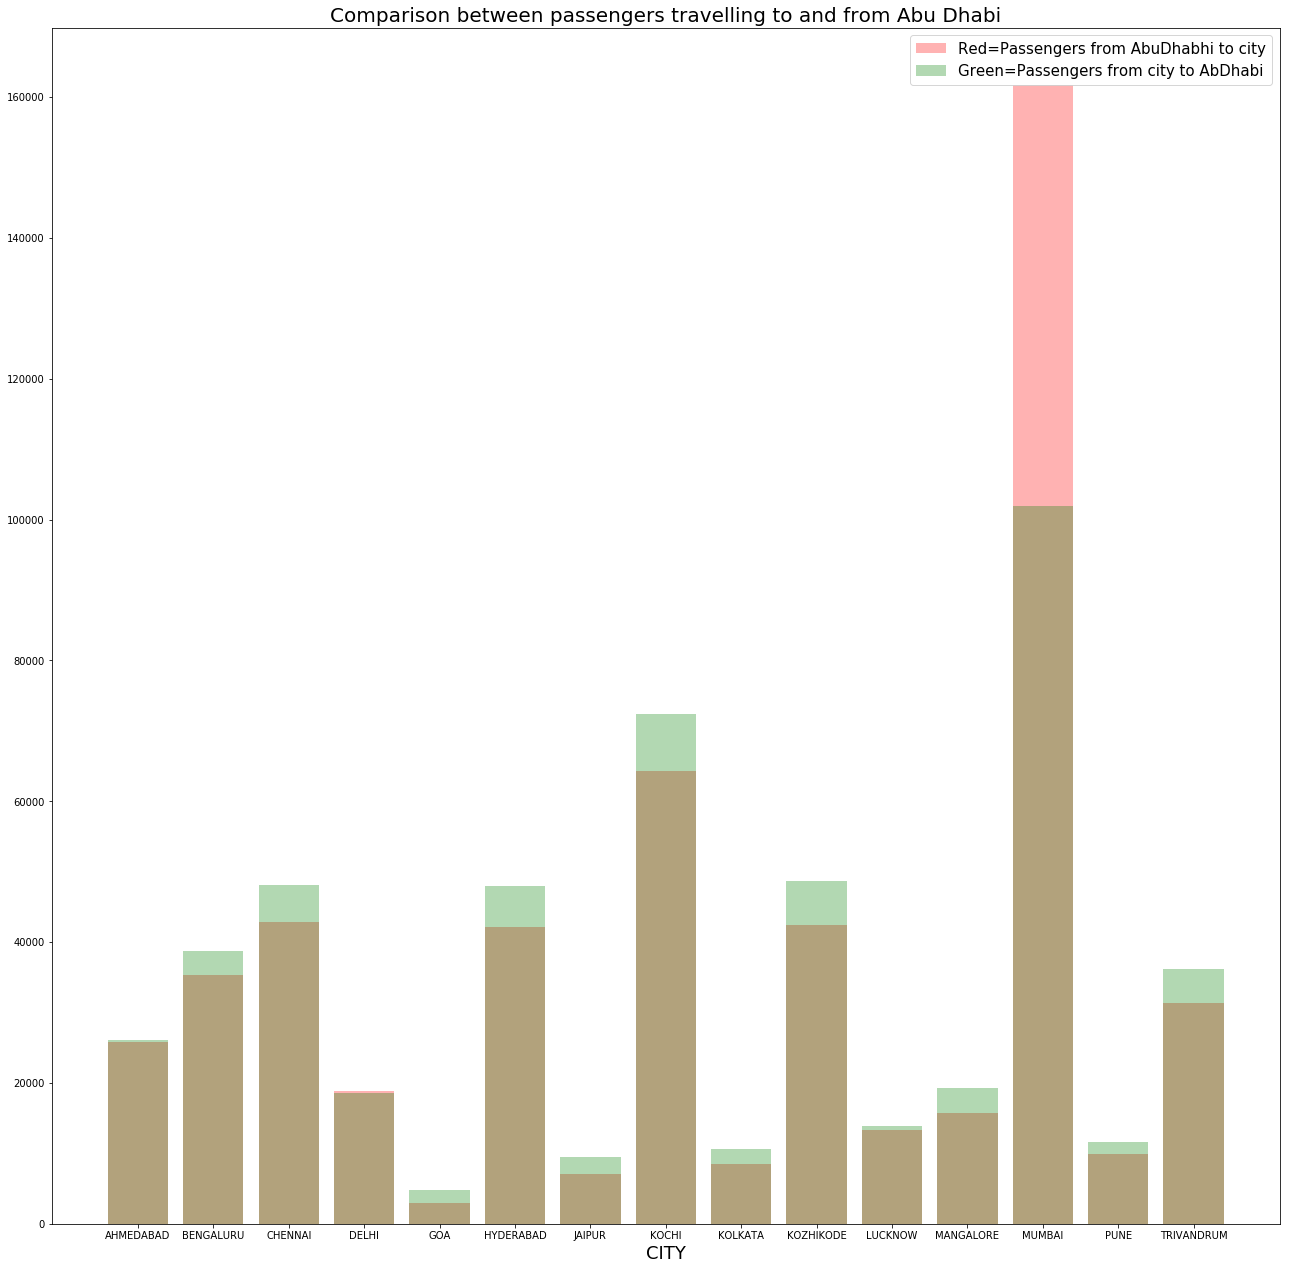

In [24]:
df16=dfS2.drop(dfS2[dfS2['YEAR']!=2016].index)
df16=df16.drop(df16[df16['CITY1']!='ABUDHABI'].index)
df16=df16.drop(df16[df16['QUARTER']!='Q1'].index)
df161=df16[['CITY2','PASSENGERS FROM CITY1 TO CITY2','PASSENGERS FROM CITY2 TO CITY1']]

plt.rcParams['figure.figsize'] = [22, 22]
plt.bar(df161['CITY2'],df161['PASSENGERS FROM CITY1 TO CITY2'],alpha=0.3,color='r')
plt.bar(df161['CITY2'],df161['PASSENGERS FROM CITY2 TO CITY1'],alpha=0.3,color='g')
plt.xlabel('CITY',fontsize=18)
l=['Red=Passengers from Abu Dhabi to city','Green=Passengers from city to Abu Dhabi']
plt.legend(l,loc=1,fontsize=15)
plt.title('Comparison between passengers travelling to and from Abu Dhabi',fontsize=20)
plt.show()